<a href="https://colab.research.google.com/github/aditi2259/AF-New/blob/main/ConvetedToCSV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import zipfile
import os

In [2]:
with zipfile.ZipFile('training2017.zip', 'r') as zip_ref:
    zip_ref.extractall('training_data')  # Extract into 'training_data' folder

In [3]:
!pip install wfdb

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.0/160.0 kB 3.0 MB/s eta 0:00:00


In [4]:
import os
import wfdb
import pandas as pd

# Define the directory containing the WFDB files
ecg_directory = '/content/training_data/training2017'

# List all files in the directory
files_in_directory = os.listdir(ecg_directory)

# Filter for the .hea files, which are the header files for the WFDB records
hea_files = [f for f in files_in_directory if f.endswith('.hea')]

# Iterate over each WFDB record
for hea_file in hea_files:
    # Extract the base name (without extension) to get the record name (e.g., 'A00001')
    record_name = os.path.splitext(hea_file)[0]

    # Read the WFDB record (this reads both the .hea and corresponding .dat files)
    record = wfdb.rdsamp(os.path.join(ecg_directory, record_name))

    # Convert the record data into a pandas DataFrame
    df = pd.DataFrame(record[0], columns=record[1]['sig_name'])

    # Save the DataFrame as a CSV file (e.g., 'A00001.csv')
    output_csv_path = os.path.join(ecg_directory, f'{record_name}.csv')
    df.to_csv(output_csv_path, index=False)

    print(f'Converted {record_name} to CSV and saved as {output_csv_path}')



Streaming output truncated to the last 5000 lines.
Converted A04096 to CSV and saved as /content/training_data/training2017/A04096.csv
Converted A04528 to CSV and saved as /content/training_data/training2017/A04528.csv
Converted A07197 to CSV and saved as /content/training_data/training2017/A07197.csv
Converted A00426 to CSV and saved as /content/training_data/training2017/A00426.csv
Converted A05452 to CSV and saved as /content/training_data/training2017/A05452.csv
Converted A00390 to CSV and saved as /content/training_data/training2017/A00390.csv
Converted A05927 to CSV and saved as /content/training_data/training2017/A05927.csv
Converted A05549 to CSV and saved as /content/training_data/training2017/A05549.csv
Converted A03368 to CSV and saved as /content/training_data/training2017/A03368.csv
Converted A07440 to CSV and saved as /content/training_data/training2017/A07440.csv
Converted A04753 to CSV and saved as /content/training_data/training2017/A04753.csv
Converted A01791 to CSV a

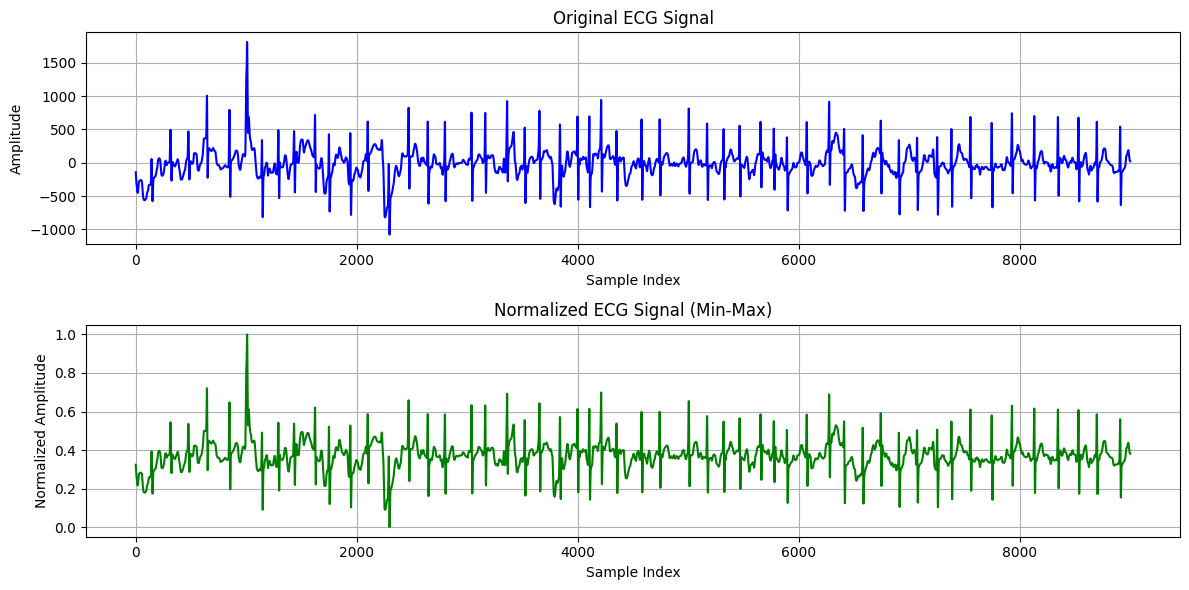

In [5]:
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt

# Load the ECG signal (as done previously)
ecg_directory = '/content/training_data/training2017'
ecg_mat_file = os.path.join(ecg_directory, 'A03852.mat')  # Adjust this file name as necessary
ecg_data = loadmat(ecg_mat_file)
ecg_signal = ecg_data['val'][0]  # Assuming 'val' contains the ECG signal

# Min-Max Normalization function
def min_max_normalize(signal):
    signal_min = np.min(signal)
    signal_max = np.max(signal)
    normalized_signal = (signal - signal_min) / (signal_max - signal_min)
    return normalized_signal

# Apply Min-Max Normalization
normalized_ecg_signal = min_max_normalize(ecg_signal)

# Visualize the original and normalized signals
plt.figure(figsize=(12, 6))

# Plot original signal
plt.subplot(2, 1, 1)
plt.plot(ecg_signal, color='b')
plt.title('Original ECG Signal')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.grid(True)

# Plot normalized signal
plt.subplot(2, 1, 2)
plt.plot(normalized_ecg_signal, color='g')
plt.title('Normalized ECG Signal (Min-Max)')
plt.xlabel('Sample Index')
plt.ylabel('Normalized Amplitude')
plt.grid(True)

plt.tight_layout()
plt.show()

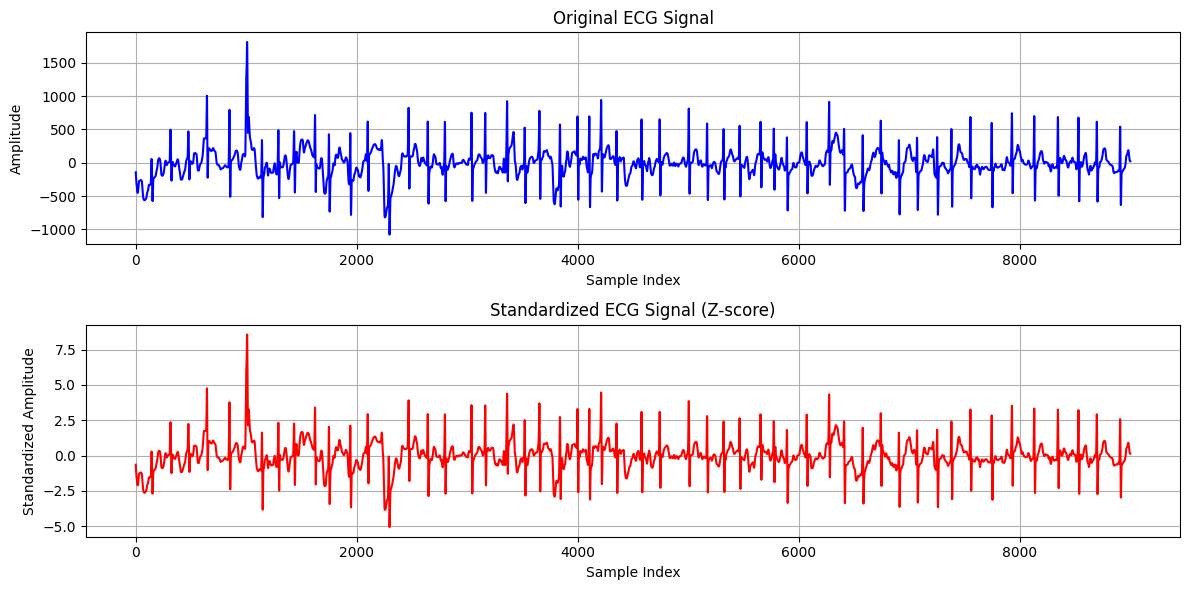

In [6]:
# Z-Score Normalization (Standardization) function
def z_score_normalize(signal):
    signal_mean = np.mean(signal)
    signal_std = np.std(signal)
    standardized_signal = (signal - signal_mean) / signal_std
    return standardized_signal

# Apply Z-score Normalization
standardized_ecg_signal = z_score_normalize(ecg_signal)

# Visualize the original and standardized signals
plt.figure(figsize=(12, 6))

# Plot original signal
plt.subplot(2, 1, 1)
plt.plot(ecg_signal, color='b')
plt.title('Original ECG Signal')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.grid(True)

# Plot standardized signal
plt.subplot(2, 1, 2)
plt.plot(standardized_ecg_signal, color='r')
plt.title('Standardized ECG Signal (Z-score)')
plt.xlabel('Sample Index')
plt.ylabel('Standardized Amplitude')
plt.grid(True)

plt.tight_layout()
plt.show()

In [7]:
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt

In [9]:
ecg_directory = '/content/training_data/training2017'
ecg_mat_file = os.path.join(ecg_directory, 'A03852.mat')  # Adjust this file name as necessary
ecg_data = loadmat(ecg_mat_file)
ecg_signal = ecg_data['val'][0]

In [10]:
def min_max_normalize(signal):
    signal_min = np.min(signal)
    signal_max = np.max(signal)
    normalized_signal = (signal - signal_min) / (signal_max - signal_min)
    return normalized_signal

In [11]:
normalized_ecg_signal = min_max_normalize(ecg_signal)

# Visualize the original and normalized signals
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

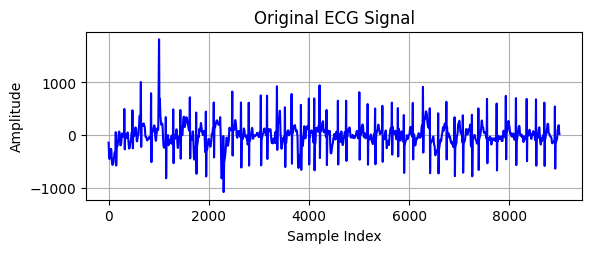

In [12]:
plt.subplot(2, 1, 1)
plt.plot(ecg_signal, color='b')
plt.title('Original ECG Signal')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.grid(True)

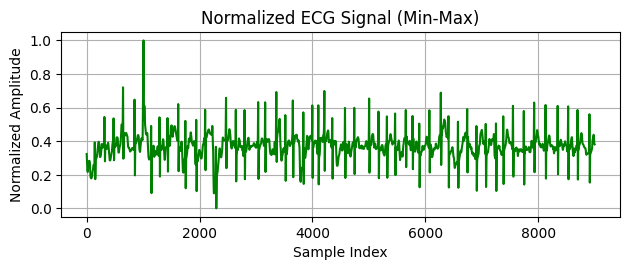

In [13]:
plt.subplot(2, 1, 2)
plt.plot(normalized_ecg_signal, color='g')
plt.title('Normalized ECG Signal (Min-Max)')
plt.xlabel('Sample Index')
plt.ylabel('Normalized Amplitude')
plt.grid(True)

plt.tight_layout()
plt.show()

In [14]:
def z_score_normalize(signal):
    signal_mean = np.mean(signal)
    signal_std = np.std(signal)
    standardized_signal = (signal - signal_mean) / signal_std
    return standardized_signal

In [15]:
standardized_ecg_signal = z_score_normalize(ecg_signal)

# Visualize the original and standardized signals
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

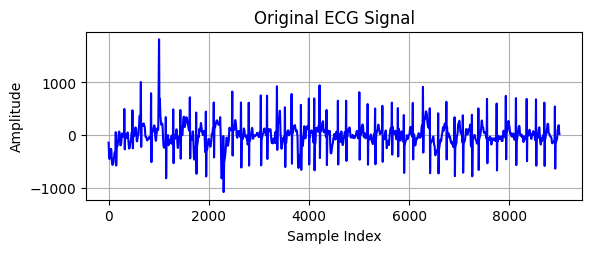

In [16]:
# Plot original signal
plt.subplot(2, 1, 1)
plt.plot(ecg_signal, color='b')
plt.title('Original ECG Signal')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.grid(True)

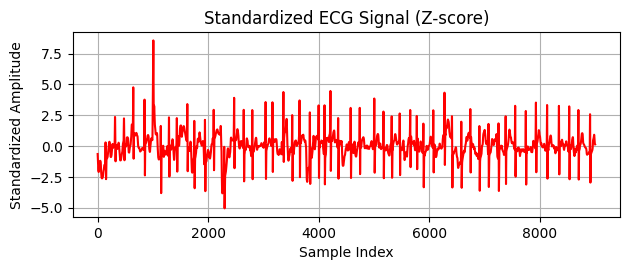

In [17]:
# Plot standardized signal
plt.subplot(2, 1, 2)
plt.plot(standardized_ecg_signal, color='r')
plt.title('Standardized ECG Signal (Z-score)')
plt.xlabel('Sample Index')
plt.ylabel('Standardized Amplitude')
plt.grid(True)

plt.tight_layout()
plt.show()

In [24]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [25]:
ecg_data = [
    np.random.randn(500),  # Example ECG signal of length 500
    np.random.randn(500),  # Another example ECG signal
    # Add more ECG signals here...
]

In [26]:
ecg_data = np.array(ecg_data)

In [27]:
if len(ecg_data.shape) == 1:
    ecg_data = ecg_data.reshape(-1, 1)

In [28]:
scaler = StandardScaler()
ecg_data_normalized = scaler.fit_transform(ecg_data)

In [29]:
X_train, X_test = train_test_split(ecg_data_normalized, test_size=0.2, random_state=42)


In [30]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [32]:
y_train = np.random.randint(0, 2, size=(X_train.shape[0],))  # Binary classification
y_test = np.random.randint(0, 2, size=(X_test.shape[0],))
print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

Training data shape: (1, 500, 1)
Testing data shape: (1, 500, 1)


In [33]:
model = Sequential()


In [34]:
# First LSTM layer
model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [35]:
# Second GRU layer
model.add(GRU(units=100, return_sequences=False))
model.add(Dropout(0.2))


In [36]:
# Fully connected layer
model.add(Dense(units=64, activation='relu'))


In [37]:
# Output layer (for binary classification, we use sigmoid)
model.add(Dense(units=1, activation='sigmoid'))


In [38]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 500, 100)            │          40,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 500, 100)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru (GRU)                            │ (None, 100)                 │          60,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           6,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 107,929 (421.60 KB)

 Trainable params: 107,929 (421.60 KB)

 Non-trainable params: 0 (0.00 B)

In [39]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [45]:
# Train the model
history = model.fit(
    X_train, y_train,
    epochs=50,  # Adjust as needed
    batch_size=32,
    validation_split=0.0,
    callbacks=[early_stopping]
)

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - accuracy: 1.0000 - loss: 0.6885
Epoch 2/50


/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 1.0000 - loss: 0.6718
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 645ms/step - accuracy: 1.0000 - loss: 0.6546
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 635ms/step - accuracy: 1.0000 - loss: 0.6313
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 609ms/step - accuracy: 1.0000 - loss: 0.6169
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 646ms/step - accuracy: 1.0000 - loss: 0.5652
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 1.0000 - loss: 0.5304
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 620ms/step - accuracy: 1.0000 - loss: 0.4406
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 620ms/step - accuracy: 1.0000 - loss: 0.3910
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 651ms/step - accuracy: 1.0000 - loss: 0.3800
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 641ms/step - accuracy: 1.0000 - loss: 0.2366
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1.0000 - loss: 0.0998
Epoch 13/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 1.0000 - loss: 0.0077
Epoch 14/50

In [46]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 683ms/step - accuracy: 0.0000e+00 - loss: 10.7909
Test Accuracy: 0.00%


In [47]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

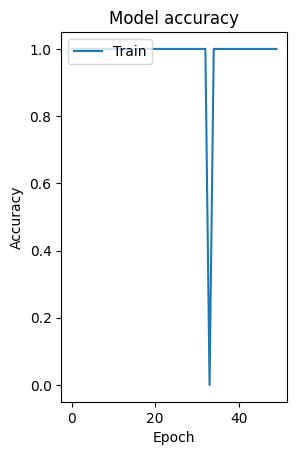

In [49]:
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

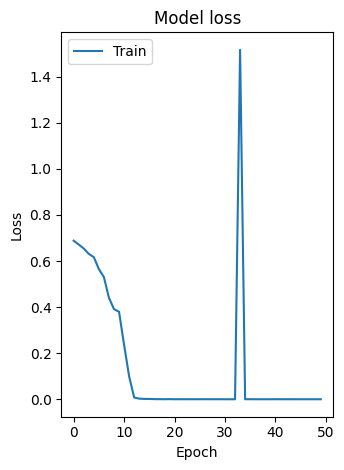

In [51]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()